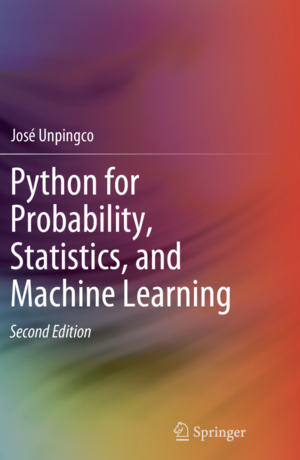

In [1]:
from IPython.display import Image
Image('../../Python_probability_statistics_machine_learning_2E.png',width=200)

The uniform distribution assigns a single constant value 
over the unit
interval. The Beta distribution generalizes this to
a function over the unit
interval. The probability density function 
of the Beta distribution is the
following,

$$
f(x ) = \frac{1}{\beta(a,b)} x^{a-1} (1-x)^{b-1}
$$

 where

$$
\beta(a,b) = \int_0^1 x^{a-1} (1-x)^{b-1} dx
$$

  Note that $a=b=1$ yields the uniform distribution. In the 
special case for
integers where $0\le k\le n$, we have

$$
\int_0^1 \binom{n}{k}x^k (1-x)^{n-k} dx = \frac{1}{n+1}
$$

 To get this result without calculus, we can use an experiment by
Thomas Bayes.
Start with $n$ white balls and one gray ball. Uniformly at
random, toss them
onto the unit interval. Let $X$ be the number of white balls
to the left of the
gray ball. Thus, $X\in \lbrace 0,1,\ldots,n \rbrace$. To
compute
$\mathbb{P}(X=k)$, we condition on the probability of the position $B$
of the
gray ball, which is uniformly distributed over the unit interval
($f(p)=1$).
Thus, we have

$$
\mathbb{P}(X=k) = \int_0^1 \mathbb{P}(X=k\vert B=p) f(p) dp = \int_0^1
\binom{n}{k}p^k (1-p)^{n-k} dp
$$

 Now, consider a slight variation on the experiment where we start
with $n+1$
white balls and again toss them onto the unit interval and then
later choose one
ball at random to color gray. Using the same $X$ as before, by
symmetry, because
any one of the $n+1$ balls is equally likely to be chosen, we
have

$$
\mathbb{P}(X=k)=\frac{1}{n+1}
$$

 for $k\in \lbrace 0,1,\ldots,n \rbrace$. Both situations describe the
same
problem because it does not matter whether we paint the ball before or
after we
throw it. Setting the last two equations equal gives the desired
result without
using calculus.

$$
\int_0^1 \binom{n}{k}p^k (1-p)^{n-k} dp =  \frac{1}{n+1}
$$

The following code shows where to get the Beta distribution from the `scipy`
module.

In [2]:
from scipy.stats import beta
x = beta(1,1) # create random variable object
print(x.cdf(1))

1.0


Given this experiment, it is not too surprising that there is an intimate
relationship between the Beta distribution and binomial random variables.
Suppose we want to estimate the probability of heads for coin-tosses using
Bayesian inference. Using this approach, all unknown quantities are treated as
random variables.  In this case, the probability of heads ($p$) is the unknown
quantity that requires a *prior* distribution. Let us choose the Beta
distribution as the prior distribution, $\texttt{Beta}(a,b)$. Then,
conditioning
on $p$, we have

$$
X\vert p \sim \texttt{binom}(n,p)
$$

 which says that $X$ is conditionally  distributed as a binomial. To 
get the
posterior probability, $f(p\vert X=k)$, we have the following
Bayes rule,

$$
f(p\vert X=k) = \frac{\mathbb{P}(X=k\vert p)f(p)}{\mathbb{P}(X=k)}
$$

 with the corresponding denominator,

$$
\mathbb{P}(X=k) = \int_0^1 \binom{n}{k}p^k (1-p)^{n-k}f(p) dp
$$

 Note that unlike with our experiment before, $f(p)$ is not constant.
Without
substituting in all of the distributions,  we observe that the
posterior is a
function of $p$ which means that everything else that is not a
function of $p$
is a constant.  This gives,

$$
f(p\vert X=k) \propto p^{a+k-1} (1-p)^{b+n-k-1}
$$

 which is another Beta distribution with parameters $a+k,b+n-k$. This
special
relationship in which the beta prior probability distribution on $p$ on
data
that are conditionally binomial distributed  yields the posterior that is
also
binomial distributed is known as *conjugacy*. We say that the Beta
distribution
is the conjugate prior of the binomial distribution.